In [1]:
import sqlalchemy

In [3]:
!pip install pymysql

  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)


In [11]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#connection created in between sql and python 
engine = sqlalchemy.create_engine('mysql+pymysql://root:@localhost:3306/powerbi')

In [25]:
#load customers, purchase, products table from sqlDB
customers = pd.read_sql_table("customers1",engine)
purchase = pd.read_sql_table("purchase",engine)
products=pd.read_sql_table("products",engine)

In [27]:
customers

,customerID,customername,country
0,4001,Ryan Wiley,Senegal
1,4002,Crystal Roberts,British Indian Ocean Territory (Chagos Archipe...
2,4003,Christina Vargas,Romania
3,4004,Kevin Gordon,Malta
4,4005,Christopher Roach,Niger
...,...,...,...
995,4996,Tracy Fitzgerald,Guinea-Bissau
996,4997,Benjamin Randall,Philippines
997,4998,David Grant,French Southern Territories
998,4999,Kristi Williams,Norway


In [29]:
products

,productid,productname,productcategory
0,201,Air Conditioner,Home Appliances
1,202,Blender,Home Appliances
2,203,Camera,Electronics
3,204,Coffee Maker,Home Appliances
4,205,Electric Kettle,Home Appliances
5,206,Headphones,Electronics
6,207,Heater,Home Appliances
7,208,Laptop,Electronics
8,209,Microwave,Home Appliances
9,210,Printer,Electronics


In [31]:
purchase

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,productid,TransactionID
0,5001,1,477.05,2023-06-26,4002,217,650
1,5002,3,54.96,2023-06-26,4001,207,224
2,5003,3,757.42,2023-06-27,4004,207,376
3,5004,3,579.06,2023-06-27,4003,205,152
4,5005,1,316.81,2023-06-27,4005,215,635
...,...,...,...,...,...,...,...
995,5996,5,527.87,2024-06-24,4997,203,864
996,5997,1,401.99,2024-06-24,4996,220,439
997,5998,5,568.75,2024-06-25,4998,210,37
998,5999,2,813.03,2024-06-25,4999,206,83


In [33]:
purchase.head()

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,productid,TransactionID
0,5001,1,477.05,2023-06-26,4002,217,650
1,5002,3,54.96,2023-06-26,4001,207,224
2,5003,3,757.42,2023-06-27,4004,207,376
3,5004,3,579.06,2023-06-27,4003,205,152
4,5005,1,316.81,2023-06-27,4005,215,635


In [35]:
#null values count in purchase table
purchase.isnull().count()

PurchaseID          1000
PurchaseQuantity    1000
PurchasePrice       1000
PurchaseDate        1000
customerid          1000
productid           1000
TransactionID       1000
dtype: int64

In [37]:
#check shape of dataframe
purchase.shape

(1000, 7)

In [39]:
#purchase table information 
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PurchaseID        1000 non-null   int64         
 1   PurchaseQuantity  1000 non-null   int64         
 2   PurchasePrice     1000 non-null   float64       
 3   PurchaseDate      1000 non-null   datetime64[ns]
 4   customerid        1000 non-null   int64         
 5   productid         1000 non-null   int64         
 6   TransactionID     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 54.8 KB


In [41]:
#Calculate total purchases, total revenue, and average purchase value.
Total_purchase = sum(purchase["PurchasePrice"])
Total_purchase

489274.72

In [43]:
#average of total purchase value  
Average_purchase = purchase["PurchasePrice"].mean()
Average_purchase

489.27471999999995

In [53]:
#top cutomers and purchasing behaviour
# Sorting by 'Spending' to find top customers by highest spending
merge1= pd.merge(purchase,customers,left_on="customerid",right_on="customerID")
merge2= pd.merge(merge1,products,on="productid")
merge2

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,productid,TransactionID,customerID,customername,country,productname,productcategory
0,5001,1,477.05,2023-06-26,4002,217,650,4002,Crystal Roberts,British Indian Ocean Territory (Chagos Archipe...,Television,Electronics
1,5002,3,54.96,2023-06-26,4001,207,224,4001,Ryan Wiley,Senegal,Heater,Home Appliances
2,5003,3,757.42,2023-06-27,4004,207,376,4004,Kevin Gordon,Malta,Heater,Home Appliances
3,5004,3,579.06,2023-06-27,4003,205,152,4003,Christina Vargas,Romania,Electric Kettle,Home Appliances
4,5005,1,316.81,2023-06-27,4005,215,635,4005,Christopher Roach,Niger,Smartwatch,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5996,5,527.87,2024-06-24,4997,203,864,4997,Benjamin Randall,Philippines,Camera,Electronics
996,5997,1,401.99,2024-06-24,4996,220,439,4996,Tracy Fitzgerald,Guinea-Bissau,Washing Machine,Home Appliances
997,5998,5,568.75,2024-06-25,4998,210,37,4998,David Grant,French Southern Territories,Printer,Electronics
998,5999,2,813.03,2024-06-25,4999,206,83,4999,Kristi Williams,Norway,Headphones,Electronics


In [55]:
#Analyze purchase trends over time (monthly, quarterly, yearly)
purchase['Month'] = purchase['PurchaseDate'].dt.month
purchase['Year'] = purchase['PurchaseDate'].dt.year
purchase

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,productid,TransactionID,Month,Year
0,5001,1,477.05,2023-06-26,4002,217,650,6,2023
1,5002,3,54.96,2023-06-26,4001,207,224,6,2023
2,5003,3,757.42,2023-06-27,4004,207,376,6,2023
3,5004,3,579.06,2023-06-27,4003,205,152,6,2023
4,5005,1,316.81,2023-06-27,4005,215,635,6,2023
...,...,...,...,...,...,...,...,...,...
995,5996,5,527.87,2024-06-24,4997,203,864,6,2024
996,5997,1,401.99,2024-06-24,4996,220,439,6,2024
997,5998,5,568.75,2024-06-25,4998,210,37,6,2024
998,5999,2,813.03,2024-06-25,4999,206,83,6,2024


In [109]:
#highest quantity ordered by customers
merge2.groupby("productname")["PurchasePrice"].sum()

productname
Air Conditioner    24812.05
Blender            15629.13
Camera             24985.70
Coffee Maker       19517.16
Electric Kettle    22566.28
Headphones         27748.78
Heater             28828.67
Laptop             24493.14
Microwave          30970.75
Printer            27360.29
Refrigerator       27730.95
Router             21897.88
Smart Bulb         22575.66
Smartphone         22508.32
Smartwatch         29407.68
Tablet             22028.51
Television         25188.60
Toaster            29116.03
Vacuum Cleaner     21921.68
Washing Machine    19987.46
Name: PurchasePrice, dtype: float64

In [111]:
merge2.groupby("productname")["PurchaseQuantity"].sum()

productname
Air Conditioner    165
Blender            105
Camera             136
Coffee Maker       150
Electric Kettle    151
Headphones         142
Heater             183
Laptop             154
Microwave          180
Printer            163
Refrigerator       167
Router             148
Smart Bulb         152
Smartphone         115
Smartwatch         159
Tablet             150
Television         161
Toaster            191
Vacuum Cleaner     133
Washing Machine    148
Name: PurchaseQuantity, dtype: int64

In [107]:
monthly_sales = purchase.groupby("Month")["PurchasePrice"].sum()
monthly_sales

Month
1     43575.14
2     41393.77
3     37442.66
4     34165.64
5     42799.97
6     31563.91
7     47956.69
8     33493.46
9     46764.80
10    38368.97
11    39839.29
12    51910.42
Name: PurchasePrice, dtype: float64

<Axes: title={'center': 'Monthly Purchase Trends'}, xlabel='Month'>

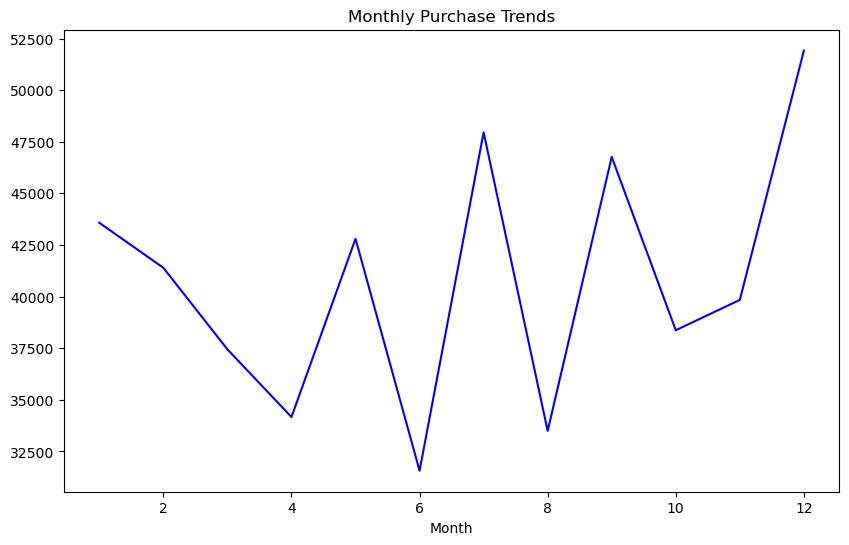

In [59]:
# Plot monthly sales trends
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Purchase Trends',color='blue')

In [61]:
# Convert to quarterly periods
purchase['Quarter'] = purchase['PurchaseDate'].dt.to_period('Q')
purchase

,PurchaseID,PurchaseQuantity,PurchasePrice,PurchaseDate,customerid,productid,TransactionID,Month,Year,Quarter
0,5001,1,477.05,2023-06-26,4002,217,650,6,2023,2023Q2
1,5002,3,54.96,2023-06-26,4001,207,224,6,2023,2023Q2
2,5003,3,757.42,2023-06-27,4004,207,376,6,2023,2023Q2
3,5004,3,579.06,2023-06-27,4003,205,152,6,2023,2023Q2
4,5005,1,316.81,2023-06-27,4005,215,635,6,2023,2023Q2
...,...,...,...,...,...,...,...,...,...,...
995,5996,5,527.87,2024-06-24,4997,203,864,6,2024,2024Q2
996,5997,1,401.99,2024-06-24,4996,220,439,6,2024,2024Q2
997,5998,5,568.75,2024-06-25,4998,210,37,6,2024,2024Q2
998,5999,2,813.03,2024-06-25,4999,206,83,6,2024,2024Q2


In [67]:
# Group by Quarter and calculate total sales
quarterly_sales = purchase.groupby('Quarter')['PurchasePrice'].sum()
quarterly_sales

Quarter
2023Q2      4012.44
2023Q3    128214.95
2023Q4    130118.68
2024Q1    122411.57
2024Q2    104517.08
Freq: Q-DEC, Name: PurchasePrice, dtype: float64

<Axes: title={'center': 'Quarterly Purchase Trends'}, xlabel='Quarter'>

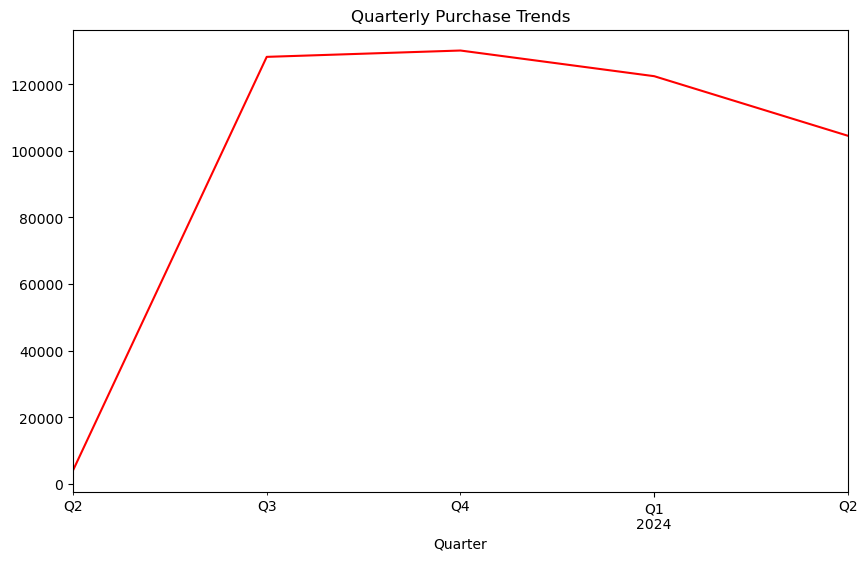

In [65]:
# Plot Quarterly sales trends
quarterly_sales.plot(kind='line', figsize=(10, 6), title='Quarterly Purchase Trends',linestyle='-',color='red')

(array([2022.8, 2023. , 2023.2, 2023.4, 2023.6, 2023.8, 2024. , 2024.2]),
 [Text(2022.8000000000002, 0, '2022.8'),
  Text(2023.0, 0, '2023.0'),
  Text(2023.2, 0, '2023.2'),
  Text(2023.4, 0, '2023.4'),
  Text(2023.6, 0, '2023.6'),
  Text(2023.8000000000002, 0, '2023.8'),
  Text(2024.0, 0, '2024.0'),
  Text(2024.2, 0, '2024.2')])

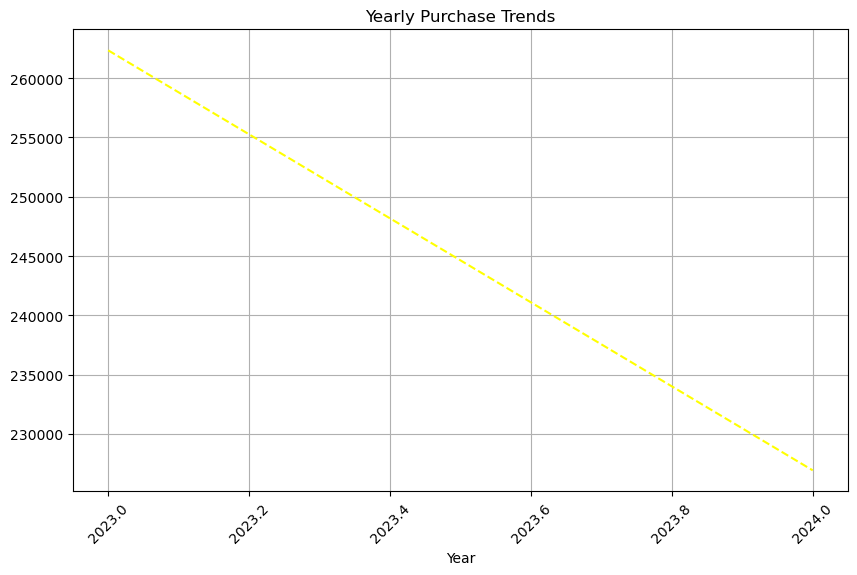

In [71]:
yearly_sales = purchase.groupby('Year')['PurchasePrice'].sum()

# Plot yearly sales trends
yearly_sales.plot(kind='line', figsize=(10, 6), title='Yearly Purchase Trends',linestyle='--',color='yellow')

# Add grid line

plt.grid(True)

# Rotating the xticks

plt.xticks(rotation = 45)

In [75]:
# Identifying top product category #
#Identify the top-performing product categories.
merge2 = pd.merge(purchase,products,left_on='productid', right_on='productid')
category_analysis = merge2.groupby("productcategory")["PurchasePrice"].sum()
category_analysis

productcategory
Electronics        248194.56
Home Appliances    241080.16
Name: PurchasePrice, dtype: float64

<Axes: title={'center': 'Yearly Purchase Trends'}, ylabel='PurchasePrice'>

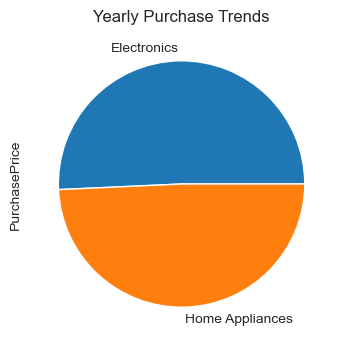

In [115]:
# category_analysis
category_analysis.plot(kind='pie', figsize=(6, 4), title='Yearly Purchase Trends')

<Axes: title={'center': 'Monthly Purchase Trends'}, xlabel='Month'>

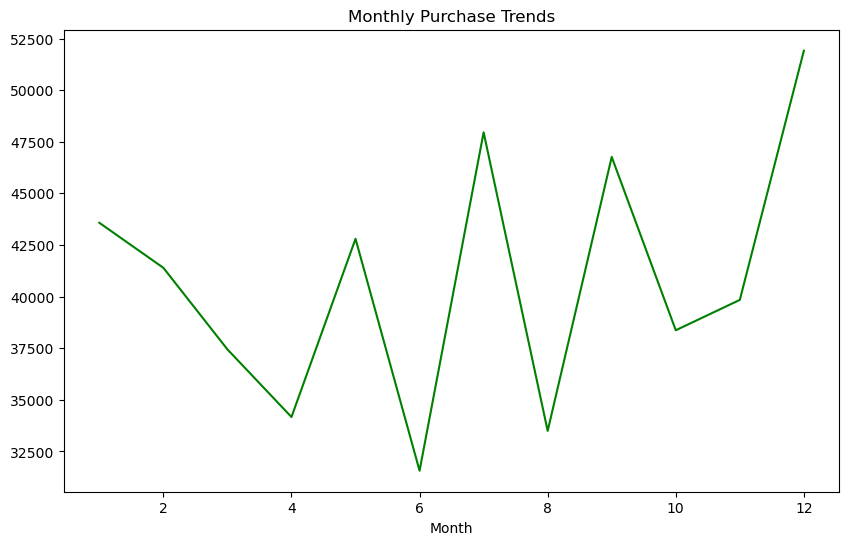

In [91]:
# Plot monthly sales trends
monthly_sales.plot(kind='line', figsize=(10, 6), title='Monthly Purchase Trends',color='green')

In [95]:
purchase.to_csv('purchase.csv')

In [97]:
customers.to_csv('customers.csv')

In [99]:
products.to_csv('products.csv')

In [ ]:
                                     REPORT SUMMARY

1.TOTAL PURCHASE ANALYSIS
FROM THE DATA FOR YEAR 2023 AND 2024 THE TOTAL REVENUE AMOUNT IS $489,274.71
AND AVERAGE PURCHASE ACROSS ALL TRANSACTION IS $489.27.

2.Identify top customers and their purchasing behavior.
FROM THE DATASET I CONCLUDE THAT PRODUCT CATEGORY "MICROWAVES" HAS DONE SIGNIFICANTLY GREAT JOB.
THIS PRODUCT IS HAVING HIGHEST QUANTITY SOLD 180 UNITS.WITH RVENUE "$30,970.75."

3.Analyze purchase trends over time (monthly, quarterly, yearly).
FROM THE DATASET IN THE MONTH(JULY-2023) HAVE HIGHEST PURCHASE.

4.Identify the top-performing product categories.
FROM THE DATASET I CONCLUDE THAT PRODUCT CATEGORY "ELECTRONICS" HAS SLIGHTLY MORE REVENUE THAN "HOME APPLIANCES".
AND REVENUE FOR "ELECTRONICS PRODUCT" = $248194.56

